# Comparing Machine Learning Performance For Credit Card Fraud Detection

In [1]:
#Import Library
import pandas as pd
import numpy as np 

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

!kaggle datasets download -d nelgiriyewithana/credit-card-fraud-detection-dataset-2023 -f creditcard_2023.csv

In [2]:
#load data
data = pd.read_csv('creditcard_2023.csv')
data.set_index('id',inplace=True)
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1


#Dataset Key Feature
id: Unique identifier for each transaction
V1-V28: Anonymized features representing various transaction attributes (e.g., time, location, etc.)
Amount: The transaction amount
Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     56

In [4]:
#check if there is null on data
data.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

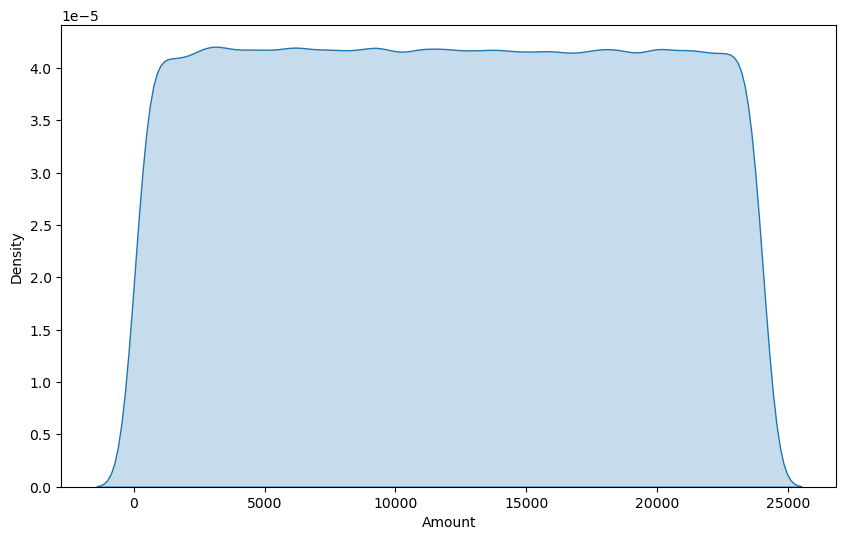

In [5]:
plt.figure(figsize=(10,6))
sns.kdeplot(data = data, x = 'Amount', fill = True)
plt.show()
#The transaction count exhibits a nearly uniform distribution across small, medium, and high-value transactions.

In [6]:
# Scaling X features
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
train_size = int(0.8 * len(data))
y = data['Class']
X = scaler.fit_transform(data.drop(['Class'],axis=1))
# Split Train & Test
y_train = (y[:train_size])
X_train = (X[:train_size])
y_test = (y[train_size:])
X_test = (X[train_size:])

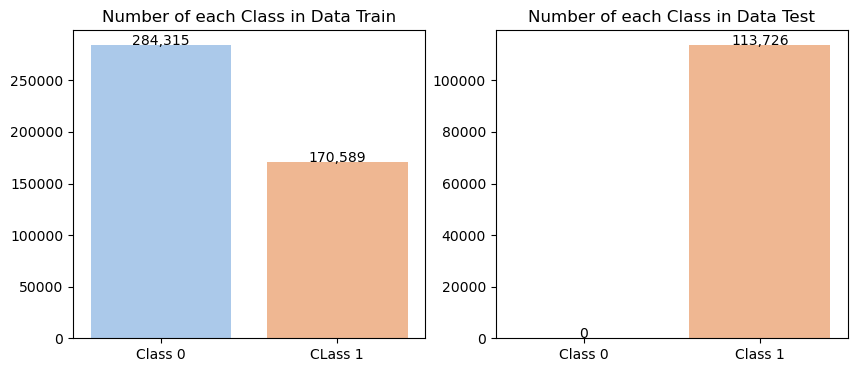

In [7]:
count0train,count1train = np.sum(y_train==0),np.sum(y_train==1)
count0test,count1test =  np.sum(y_test==0),np.sum(y_test==1)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plot Train
ax0 = sns.barplot(x=['Class 0', 'CLass 1'], y=[count0train, count1train], palette='pastel', ax=ax[0])
ax[0].set_title('Number of each Class in Data Train')
for p in ax0.patches:
    ax0.annotate('{:,.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
# Plot Test
ax1 = sns.barplot(x=['Class 0', 'Class 1'], y=[count0test, count1test], palette='pastel', ax=ax[1])
ax[1].set_title('Number of each Class in Data Test')
for p in ax1.patches:
    ax1.annotate('{:,.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# Displaying plot
plt.show()

In [11]:
#Classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Training
    model.fit(X_train, y_train)
    
    # Prediction
    y_pred = model.predict(X_test)
    
    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return accuracy, precision, recall, f1

def compare_models(X_train, y_train, X_test, y_test):
    results = {}
    
    # Model Initialization
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'SVM': SVC(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'Random Forest': RandomForestClassifier(),
        'XGBoost': XGBClassifier(),
        'CatBoost': CatBoostClassifier(),
        'LightGBM': LGBMClassifier(),
        'Naive Bayes': GaussianNB(),
        'KNN': KNeighborsClassifier()
    }
    
    # Train & Evaluation
    for name, model in models.items():
        accuracy, precision, recall, f1 = train_and_evaluate(model, X_train, y_train, X_test, y_test)
        results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    
    return results

results = compare_models(X_train, y_train, X_test, y_test)

Learning rate set to 0.140561
0:	learn: 0.4429357	total: 410ms	remaining: 6m 49s
1:	learn: 0.2953669	total: 658ms	remaining: 5m 28s
2:	learn: 0.2249862	total: 905ms	remaining: 5m
3:	learn: 0.1784866	total: 1.19s	remaining: 4m 56s
4:	learn: 0.1469409	total: 1.43s	remaining: 4m 45s
5:	learn: 0.1279598	total: 1.66s	remaining: 4m 35s
6:	learn: 0.1133904	total: 1.91s	remaining: 4m 31s
7:	learn: 0.1060450	total: 2.14s	remaining: 4m 25s
8:	learn: 0.0981471	total: 2.37s	remaining: 4m 20s
9:	learn: 0.0933354	total: 2.59s	remaining: 4m 16s
10:	learn: 0.0882720	total: 2.83s	remaining: 4m 14s
11:	learn: 0.0849637	total: 3.07s	remaining: 4m 12s
12:	learn: 0.0815724	total: 3.3s	remaining: 4m 10s
13:	learn: 0.0777342	total: 3.54s	remaining: 4m 9s
14:	learn: 0.0748344	total: 3.77s	remaining: 4m 7s
15:	learn: 0.0717287	total: 4s	remaining: 4m 6s
16:	learn: 0.0697641	total: 4.23s	remaining: 4m 4s
17:	learn: 0.0678041	total: 4.46s	remaining: 4m 3s
18:	learn: 0.0666331	total: 4.68s	remaining: 4m 1s
19:	le

157:	learn: 0.0065656	total: 36.8s	remaining: 3m 15s
158:	learn: 0.0065357	total: 37s	remaining: 3m 15s
159:	learn: 0.0064499	total: 37.2s	remaining: 3m 15s
160:	learn: 0.0063531	total: 37.5s	remaining: 3m 15s
161:	learn: 0.0062611	total: 37.7s	remaining: 3m 14s
162:	learn: 0.0061253	total: 37.9s	remaining: 3m 14s
163:	learn: 0.0060866	total: 38.2s	remaining: 3m 14s
164:	learn: 0.0060110	total: 38.4s	remaining: 3m 14s
165:	learn: 0.0059218	total: 38.7s	remaining: 3m 14s
166:	learn: 0.0058535	total: 38.9s	remaining: 3m 13s
167:	learn: 0.0058108	total: 39.1s	remaining: 3m 13s
168:	learn: 0.0057545	total: 39.3s	remaining: 3m 13s
169:	learn: 0.0056931	total: 39.6s	remaining: 3m 13s
170:	learn: 0.0056343	total: 39.8s	remaining: 3m 13s
171:	learn: 0.0056039	total: 40.1s	remaining: 3m 12s
172:	learn: 0.0055667	total: 40.3s	remaining: 3m 12s
173:	learn: 0.0055146	total: 40.5s	remaining: 3m 12s
174:	learn: 0.0054626	total: 40.8s	remaining: 3m 12s
175:	learn: 0.0054095	total: 41s	remaining: 3m 1

313:	learn: 0.0028930	total: 1m 10s	remaining: 2m 34s
314:	learn: 0.0028930	total: 1m 10s	remaining: 2m 34s
315:	learn: 0.0028930	total: 1m 11s	remaining: 2m 33s
316:	learn: 0.0028930	total: 1m 11s	remaining: 2m 33s
317:	learn: 0.0028930	total: 1m 11s	remaining: 2m 33s
318:	learn: 0.0028930	total: 1m 11s	remaining: 2m 32s
319:	learn: 0.0028930	total: 1m 11s	remaining: 2m 32s
320:	learn: 0.0028930	total: 1m 12s	remaining: 2m 32s
321:	learn: 0.0028930	total: 1m 12s	remaining: 2m 32s
322:	learn: 0.0028929	total: 1m 12s	remaining: 2m 31s
323:	learn: 0.0028929	total: 1m 12s	remaining: 2m 31s
324:	learn: 0.0028929	total: 1m 12s	remaining: 2m 31s
325:	learn: 0.0028929	total: 1m 12s	remaining: 2m 30s
326:	learn: 0.0028929	total: 1m 13s	remaining: 2m 30s
327:	learn: 0.0028929	total: 1m 13s	remaining: 2m 30s
328:	learn: 0.0028929	total: 1m 13s	remaining: 2m 29s
329:	learn: 0.0028929	total: 1m 13s	remaining: 2m 29s
330:	learn: 0.0028929	total: 1m 13s	remaining: 2m 29s
331:	learn: 0.0028929	total:

466:	learn: 0.0028689	total: 1m 40s	remaining: 1m 54s
467:	learn: 0.0028463	total: 1m 40s	remaining: 1m 54s
468:	learn: 0.0028462	total: 1m 40s	remaining: 1m 53s
469:	learn: 0.0028462	total: 1m 40s	remaining: 1m 53s
470:	learn: 0.0028462	total: 1m 40s	remaining: 1m 53s
471:	learn: 0.0028462	total: 1m 41s	remaining: 1m 53s
472:	learn: 0.0028462	total: 1m 41s	remaining: 1m 52s
473:	learn: 0.0028462	total: 1m 41s	remaining: 1m 52s
474:	learn: 0.0028462	total: 1m 41s	remaining: 1m 52s
475:	learn: 0.0028462	total: 1m 41s	remaining: 1m 52s
476:	learn: 0.0028463	total: 1m 41s	remaining: 1m 51s
477:	learn: 0.0028463	total: 1m 42s	remaining: 1m 51s
478:	learn: 0.0028463	total: 1m 42s	remaining: 1m 51s
479:	learn: 0.0028462	total: 1m 42s	remaining: 1m 51s
480:	learn: 0.0028462	total: 1m 42s	remaining: 1m 50s
481:	learn: 0.0028462	total: 1m 42s	remaining: 1m 50s
482:	learn: 0.0028462	total: 1m 43s	remaining: 1m 50s
483:	learn: 0.0028462	total: 1m 43s	remaining: 1m 50s
484:	learn: 0.0028462	total:

619:	learn: 0.0022523	total: 2m 8s	remaining: 1m 18s
620:	learn: 0.0022523	total: 2m 9s	remaining: 1m 18s
621:	learn: 0.0022523	total: 2m 9s	remaining: 1m 18s
622:	learn: 0.0022523	total: 2m 9s	remaining: 1m 18s
623:	learn: 0.0022523	total: 2m 9s	remaining: 1m 18s
624:	learn: 0.0022523	total: 2m 9s	remaining: 1m 17s
625:	learn: 0.0022523	total: 2m 9s	remaining: 1m 17s
626:	learn: 0.0022523	total: 2m 10s	remaining: 1m 17s
627:	learn: 0.0022523	total: 2m 10s	remaining: 1m 17s
628:	learn: 0.0022523	total: 2m 10s	remaining: 1m 16s
629:	learn: 0.0022523	total: 2m 10s	remaining: 1m 16s
630:	learn: 0.0022523	total: 2m 10s	remaining: 1m 16s
631:	learn: 0.0022523	total: 2m 10s	remaining: 1m 16s
632:	learn: 0.0022523	total: 2m 11s	remaining: 1m 16s
633:	learn: 0.0022523	total: 2m 11s	remaining: 1m 15s
634:	learn: 0.0022523	total: 2m 11s	remaining: 1m 15s
635:	learn: 0.0022523	total: 2m 11s	remaining: 1m 15s
636:	learn: 0.0022523	total: 2m 11s	remaining: 1m 15s
637:	learn: 0.0022523	total: 2m 11s

774:	learn: 0.0022516	total: 2m 35s	remaining: 45.3s
775:	learn: 0.0022516	total: 2m 36s	remaining: 45s
776:	learn: 0.0022516	total: 2m 36s	remaining: 44.8s
777:	learn: 0.0022516	total: 2m 36s	remaining: 44.6s
778:	learn: 0.0022516	total: 2m 36s	remaining: 44.4s
779:	learn: 0.0022516	total: 2m 36s	remaining: 44.2s
780:	learn: 0.0022516	total: 2m 36s	remaining: 44s
781:	learn: 0.0022516	total: 2m 37s	remaining: 43.8s
782:	learn: 0.0022516	total: 2m 37s	remaining: 43.6s
783:	learn: 0.0022516	total: 2m 37s	remaining: 43.4s
784:	learn: 0.0022516	total: 2m 37s	remaining: 43.2s
785:	learn: 0.0022516	total: 2m 37s	remaining: 43s
786:	learn: 0.0022516	total: 2m 37s	remaining: 42.8s
787:	learn: 0.0022516	total: 2m 38s	remaining: 42.5s
788:	learn: 0.0022516	total: 2m 38s	remaining: 42.3s
789:	learn: 0.0022516	total: 2m 38s	remaining: 42.1s
790:	learn: 0.0022515	total: 2m 38s	remaining: 41.9s
791:	learn: 0.0022515	total: 2m 38s	remaining: 41.7s
792:	learn: 0.0022515	total: 2m 39s	remaining: 41.5s

931:	learn: 0.0021836	total: 3m 3s	remaining: 13.4s
932:	learn: 0.0021836	total: 3m 3s	remaining: 13.2s
933:	learn: 0.0021836	total: 3m 4s	remaining: 13s
934:	learn: 0.0021836	total: 3m 4s	remaining: 12.8s
935:	learn: 0.0021836	total: 3m 4s	remaining: 12.6s
936:	learn: 0.0021836	total: 3m 4s	remaining: 12.4s
937:	learn: 0.0021836	total: 3m 4s	remaining: 12.2s
938:	learn: 0.0021836	total: 3m 4s	remaining: 12s
939:	learn: 0.0021836	total: 3m 5s	remaining: 11.8s
940:	learn: 0.0021836	total: 3m 5s	remaining: 11.6s
941:	learn: 0.0021836	total: 3m 5s	remaining: 11.4s
942:	learn: 0.0021836	total: 3m 5s	remaining: 11.2s
943:	learn: 0.0021836	total: 3m 5s	remaining: 11s
944:	learn: 0.0021836	total: 3m 6s	remaining: 10.8s
945:	learn: 0.0021836	total: 3m 6s	remaining: 10.6s
946:	learn: 0.0021836	total: 3m 6s	remaining: 10.4s
947:	learn: 0.0021836	total: 3m 6s	remaining: 10.2s
948:	learn: 0.0021836	total: 3m 6s	remaining: 10s
949:	learn: 0.0021836	total: 3m 6s	remaining: 9.84s
950:	learn: 0.002183

In [12]:
print(results)

{'Logistic Regression': {'Accuracy': 0.9315547895819777, 'Precision': 1.0, 'Recall': 0.9315547895819777, 'F1-Score': 0.964564706739261}, 'SVM': {'Accuracy': 0.9392223414170902, 'Precision': 1.0, 'Recall': 0.9392223414170902, 'F1-Score': 0.9686587467126144}, 'Gradient Boosting': {'Accuracy': 0.9570019168879588, 'Precision': 1.0, 'Recall': 0.9570019168879588, 'F1-Score': 0.9780285942793469}, 'Random Forest': {'Accuracy': 0.9999472416158135, 'Precision': 1.0, 'Recall': 0.9999472416158135, 'F1-Score': 0.9999736201120266}, 'XGBoost': {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0}, 'CatBoost': {'Accuracy': 0.9999824138719379, 'Precision': 1.0, 'Recall': 0.9999824138719379, 'F1-Score': 0.9999912068586503}, 'LightGBM': {'Accuracy': 0.999718621951005, 'Precision': 1.0, 'Recall': 0.999718621951005, 'F1-Score': 0.9998592911793158}, 'Naive Bayes': {'Accuracy': 0.8565235742046674, 'Precision': 1.0, 'Recall': 0.8565235742046674, 'F1-Score': 0.9227176924716414}, 'KNN': {'Accuracy

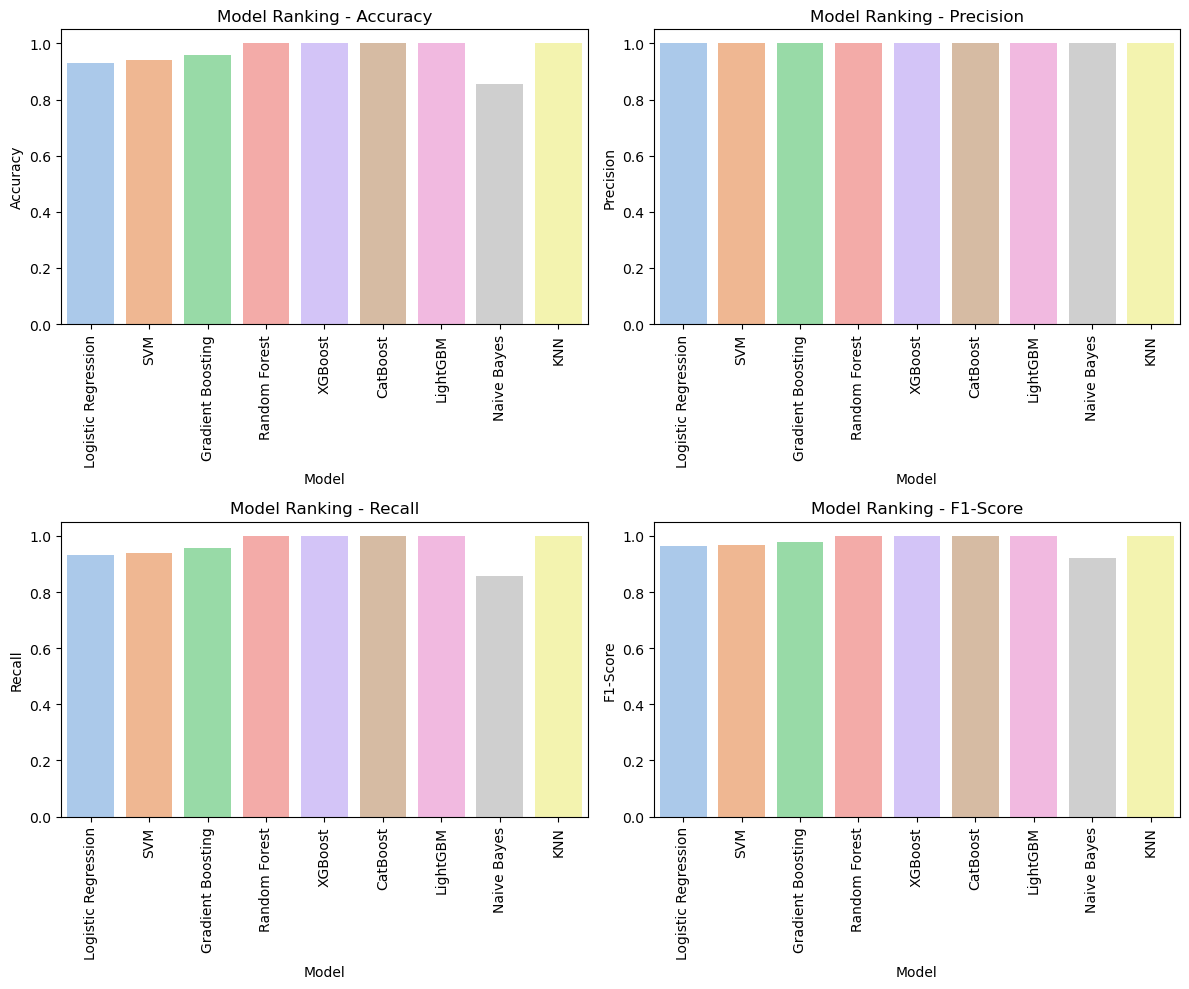

In [16]:
# Create dataframe result
df_results = pd.DataFrame(results).T

# Creating subplots for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Accuracy
sns.barplot(x=df_results.index, y=df_results['Accuracy'], palette='pastel', ax=axes[0, 0])
axes[0, 0].set_title('Model Ranking - Accuracy')
axes[0, 0].set_xlabel('Model')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels by 90 degrees

# Precision
sns.barplot(x=df_results.index, y=df_results['Precision'], palette='pastel', ax=axes[0, 1])
axes[0, 1].set_title('Model Ranking - Precision')
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels by 90 degrees

# Recall
sns.barplot(x=df_results.index, y=df_results['Recall'], palette='pastel', ax=axes[1, 0])
axes[1, 0].set_title('Model Ranking - Recall')
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels by 90 degrees

# F1-Score
sns.barplot(x=df_results.index, y=df_results['F1-Score'], palette='pastel', ax=axes[1, 1])
axes[1, 1].set_title('Model Ranking - F1-Score')
axes[1, 1].set_xlabel('Model')
axes[1, 1].set_ylabel('F1-Score')
axes[1, 1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels by 90 degrees

plt.tight_layout()
plt.show()

The evaluation results suggest that XGBoost, CatBoost, Random Forest, and LightGBM are the top-performing models among the evaluated classifiers. These models demonstrate superior performance across multiple metrics, including accuracy, precision, recall, and F1-score. The ranking is determined based on their respective scores in these metrics, and they emerge as strong contenders for the classification task at hand.

In particular:
- XGBoost consistently achieves high scores across all metrics, showcasing its robust performance.
- CatBoost demonstrates excellent accuracy, precision, recall, and F1-score, positioning it as a reliable choice.
- Random Forest exhibits a well-balanced performance, making it a competitive option for classification tasks.
- LightGBM shows strong performance across the metrics, highlighting its effectiveness in handling classification challenges.

In summary, XGBoost, CatBoost, Random Forest, and LightGBM emerge as strong contenders, each leveraging a combination of decision trees and boosting techniques to deliver impressive classification results.